## Packages used in ML : 

#### Numpy: which is a math library to work with n-dimensional arrays in Python. It enables you to do computation efficiently and effectively. Use: For working with arrays, dictionaries, functions, datatypes, and working with images

#### Scipy: SciPy is a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.SciPy is a good library for scientific and high-performance computation

#### Matplotlib: Matplotlib is a very popular plotting package that provides 2D plotting as well as 3D plotting.

#### Pandas:  Pandas library, is a very high-level python library that provides high-performance, easy to use data structures. It has many functions for data importing, manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series

#### Scikit-learn: scikit-learn is a collection of algorithms and tools for machine learning. Scikit-learn is a free machine learning library for the Python programming language. It has most of the classification, regression and clustering algorithms, and it’s designed to work with the Python numerical and scientific libraries, NumPy and SciPy. Most of the tasks that need to be done in a machine learning pipeline are implementedalready in scikit learn, including, pre-processing of data, feature selection, feature extraction, train/test splitting, defining the algorithms, fitting models, tuning parameters, prediction, evaluation, and exporting the mode

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as py 
import numpy as np 
%matplotlib inline 

In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')

#first few rows of the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration 

In [5]:
df.describe() #to summarize the data 

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
## selecting some of the features to expplore more 
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


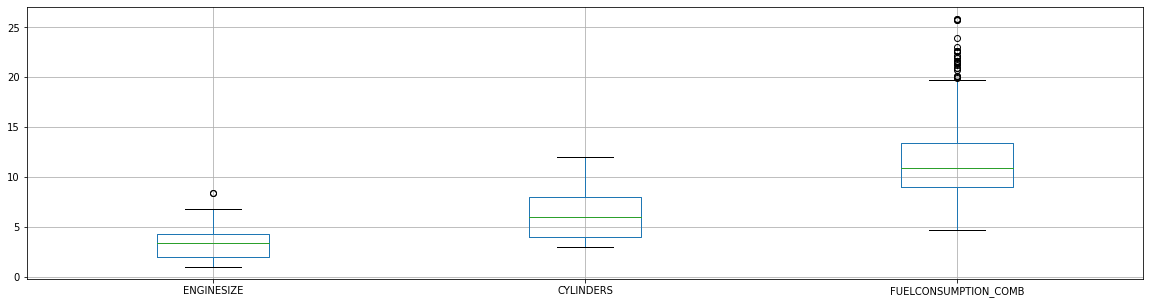

In [10]:
## plotting these features to check the distribution 
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
viz.boxplot(figsize=(20,5))
plt.show()

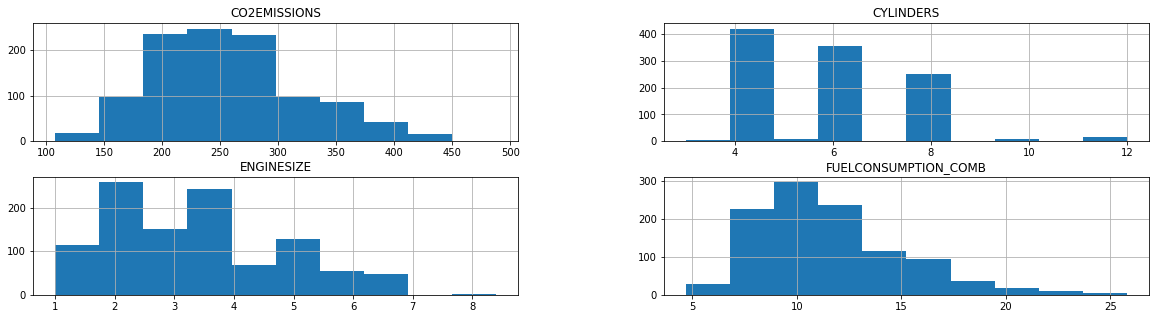

In [9]:
viz1 = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz1.hist(figsize=(20,5))
plt.show()

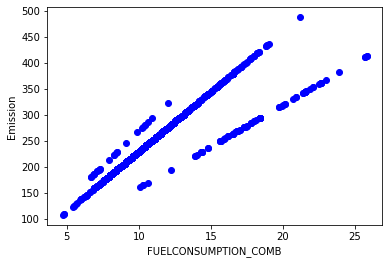

In [12]:
## scatter plots to check linear relation b/w independent and dependent variables 
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

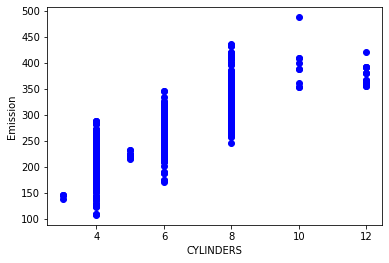

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

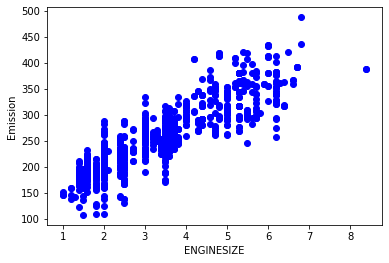

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

### creating test and train data set
split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Simple Linear regression model 

### Train data distribution 

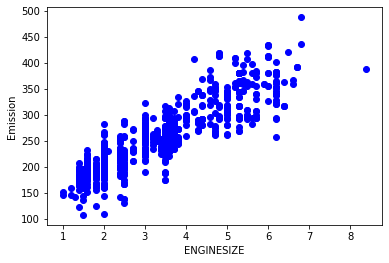

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

### Modeling 
[] will output pandas series, [[]] will output pandas dataframe

In [26]:
from sklearn import linear_model
slin_regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
slin_regr.fit(train_x, train_y)

## the coefficients 
print("Coefficients: " + str(slin_regr.coef_))
print("Intercept: "+ str(slin_regr.intercept_))


Coefficients: [[39.69112882]]
Intercept: [123.25842129]


### Fit line over the data 

Text(0, 0.5, 'Emission')

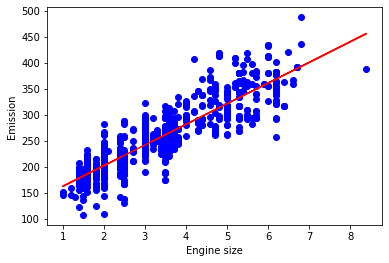

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, slin_regr.coef_[0][0]*train_x + slin_regr.intercept_ , color = 'red')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = slin_regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares: %.2f"% np.mean((test_y_hat - test_y)**2))
print("R2 score: %.2f"% r2_score(test_y_hat, test_y))

Mean absolute error: 24.56
Residual sum of squares: 1053.32
R2 score: 0.66


## Multiple Linear Regression

In [46]:
# model for multiple regression 

from sklearn import linear_model
mlr_regr = linear_model.LinearRegression()
train_x = np.asanyarray(train.iloc[:,:-1])
train_y = np.asanyarray(train.iloc[:,-1])
mlr_regr.fit(train_x, train_y)

## the coefficients 
print("Coefficients: " + str(mlr_regr.coef_))
print("Intercept: "+ str(mlr_regr.intercept_))

Coefficients: [12.30775702  7.28272947  9.03006025]
Intercept: 67.88347879680265


In [49]:
## evaluation for multiple linear regression model 

from sklearn.metrics import r2_score 
test_x = np.asanyarray(test.iloc[:,:-1])
test_y = np.asanyarray(test.iloc[:,-1])
test_y_hat = mlr_regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares: %.2f"% np.mean((test_y_hat - test_y)**2))
print("R2 score: %.2f"% r2_score(test_y_hat, test_y))

Mean absolute error: 17.16
Residual sum of squares: 535.25
R2 score: 0.82


Training accuracy is the percentage of correct predictions that the model makes when using
the test dataset.
However, a high training accuracy isn’t necessarily a good thing.
For instance, having a high training accuracy may result in an ‘over-fit’ of the data.
This means that the model is overly trained to the dataset, which may capture noise and
produce a non-generalized model.
Out-of-sample accuracy is the percentage of correct predictions that the model makes on
data that the model has NOT been trained on.
Doing a “train and test” on the same dataset will most likely have low out-of-sample accuracy
due to the likelihood of being over-fit.
It’s important that our models have high, out-of-sample accuracy, because the purpose
of our model is, of course, to make correct predictions on unknown data.

Train test split : This will provide a more accurate evaluation on out-of-sample accuracy because the testing
dataset is NOT part of the dataset that has been used to train the data.The issue with train/test split is that it’s highly dependent on the datasets on which the data was trained and tested.
The variation of this causes train/test split to have a better out-of-sample prediction than training and testing on the same dataset, but it still has some problems due to this dependency. Another evaluation model, called "K-Fold Cross-validation," resolves most of these issues. How do you fix a high variation that results from a dependency? Well, you average it.